## Introduction to Seaborn


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
%matplotlib inline

In [66]:
print(sns.get_dataset_names()) # Các dataset có sẵn

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


## Styling

In [67]:
sns.set_theme() # Apply the default theme

### Numerical Plots
* **Distribution**: Histogram, KDE (Kernel Density Estimate), displot
* **Bar Plot**
* **Count Plot**
* **Facet Plot**: Tạo ra một lưới 2D gồm các bảng được xác định bởi các biến tạo thành các hàng và cột
* **Box Plot**: PP để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tử của chúng
* **Join Plot**
* **Pair Plot**
* **Heat Map**: Một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều

### Distribution Plot
* Univariate distribution of observation

In [68]:
tips_df = sns.load_dataset('tips')

In [69]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

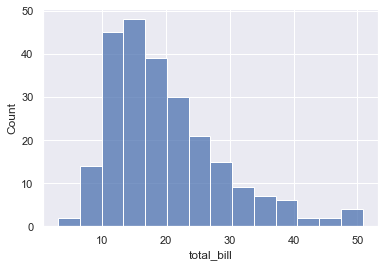

In [70]:
sns.histplot(data = tips_df['total_bill']);

In [71]:
tips_df['total_bill'].value_counts().sort_values(ascending=False)

13.42    3
10.34    2
13.81    2
7.25     2
10.33    2
        ..
11.02    1
27.28    1
11.38    1
17.07    1
26.88    1
Name: total_bill, Length: 229, dtype: int64

### KDE Plot
* A Kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram
* KDE represents the data using a continuous probability density curve in one or more dimensions

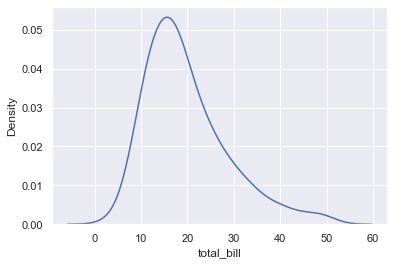

In [72]:
sns.kdeplot(data = tips_df['total_bill']);

### Displot

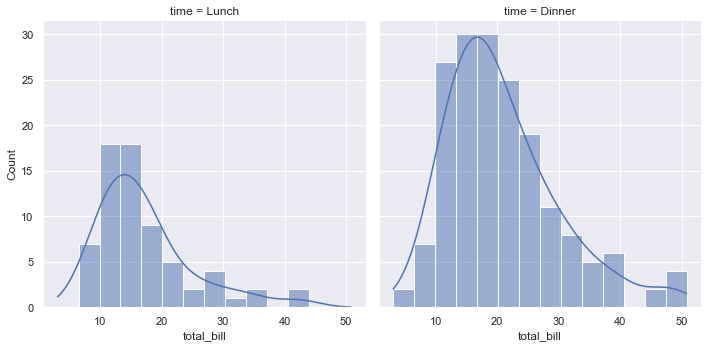

In [73]:
sns.displot(data = tips_df, x='total_bill',col = 'time', kde = True);

## Categorical Plots
### Bar Plots

In [74]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<AxesSubplot:xlabel='sex', ylabel='tip'>

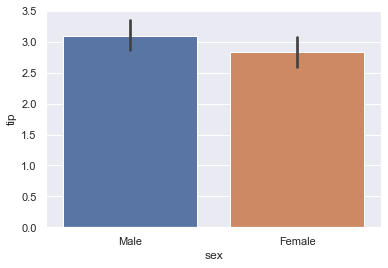

In [75]:
sns.barplot(data = tips_df, x = 'sex', y ='tip', estimator=np.mean) # Phan loai, estimator : uoc luong

## Count Plot

In [76]:
tips_df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

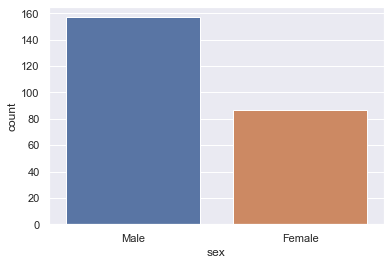

In [77]:
sns.countplot(data = tips_df, x = 'sex');

## Box Plot

Box Plots is a good indication of how the values in the data are spread out('minium', first quartile(Q1), median, third quartile(Q3), and 'maximum')

* Identify outliers
* Check if data is symmertrical
* Determine how tightly data is grouped

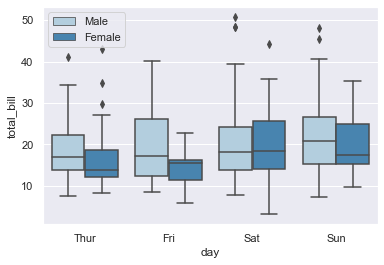

In [78]:
sns.boxplot(data = tips_df, x ='day', y='total_bill', hue='sex', palette='Blues');
plt.legend(loc=0);

## Facet Grid
* FacetGrid can be drawn with up to three dimensions: row, col, and hue.
* The main approach for vizualizing data on this grid is with the FaceGrid.map() method.

In [79]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

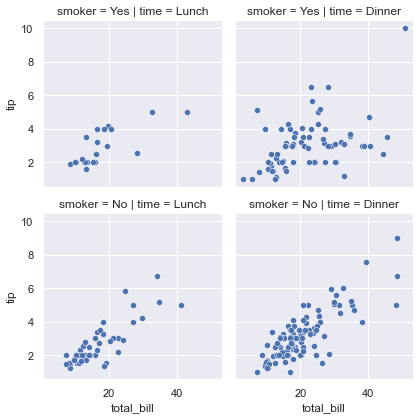

In [80]:
tips_fg = sns.FacetGrid(data=tips_df, row='smoker', col='time') #create a class instance of Facet Grid Class
tips_fg.map(sns.scatterplot, "total_bill", "tip");

# 32:00 CodeXplore

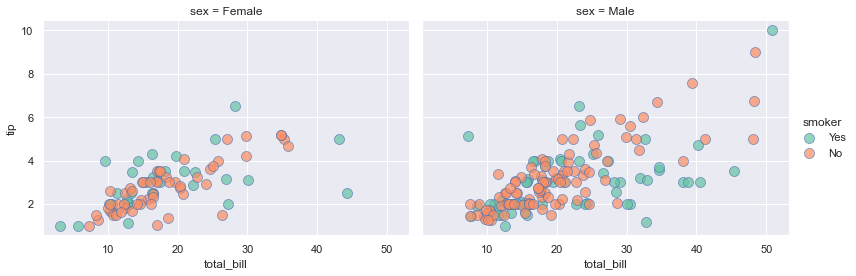

In [81]:
kws= dict(s=100, edgecolor='b', alpha=.7)

new_fg = sns.FacetGrid(data = tips_df, col = 'sex',
                        hue = 'smoker',
                        col_order=['Female', 'Male'],
                        palette='Set2',
                        height = 4, aspect = 1.4) #col_order de xuat hien theo thu tu nu trwuocs nam sau
new_fg.map(sns.scatterplot, 'total_bill', 'tip',**kws);

new_fg.add_legend();

## Joint Plot
* `joint` distribution between two variables along with each variable's marginal distribution

In [82]:
pengiuns_df = sns.load_dataset('penguins')

In [83]:
pengiuns_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

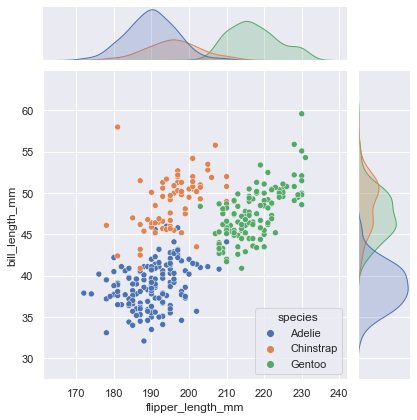

In [84]:
#do dai canh va mo
sns.jointplot(data = pengiuns_df, x='flipper_length_mm', y='bill_length_mm', hue='species'); #dùng hue để tách từng loai

# Pair Plots


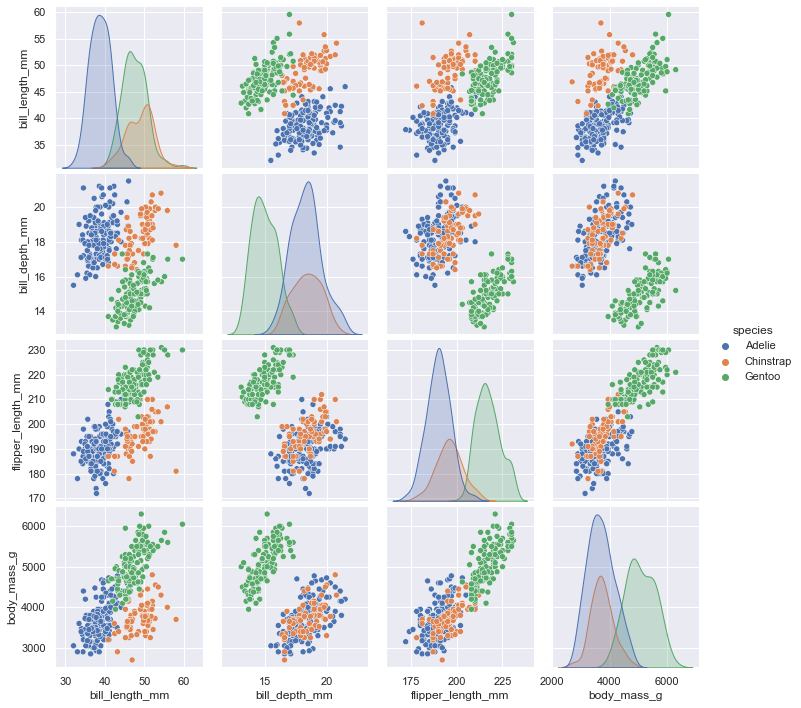

In [85]:
sns.pairplot(data=pengiuns_df, hue='species');

# Heatmaps
Describing density or intensity of variables, visualize patterns, variance and even anomalies 

In [86]:
flights_df = sns.load_dataset('flights')

In [87]:
flights_df.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [88]:
flights = pd.pivot_table(flights_df, index='month', columns='year', values='passengers')

In [89]:
flights

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

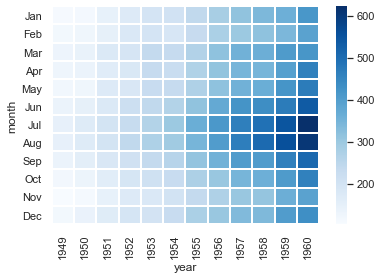

In [90]:
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1);